Написание правил для разбора ФИО и имен в разных вариациях в парсере NLTK4RUSSIAN:
это варианты

Иван Иванович Иванов

Иван Иванов

 И.Иванов

  И.И.Иванов в разных падежных формах.

(2 участник) Мурашко, Кадочникова




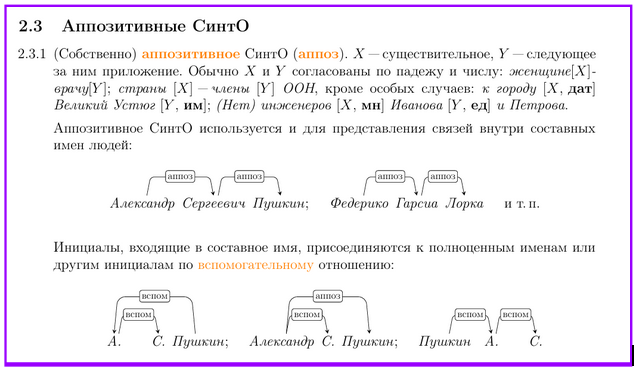

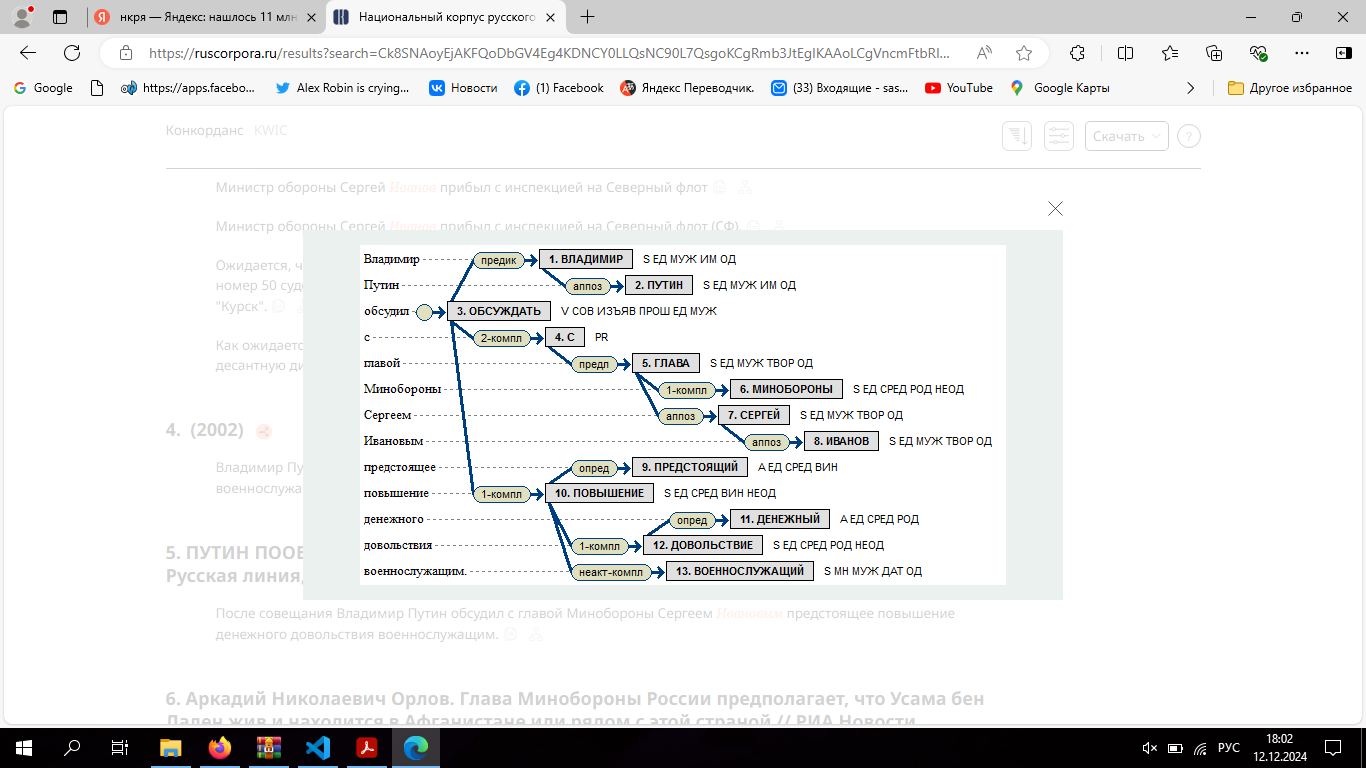

In [1]:
pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.8 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('punkt_tab')
from nltk import *
import pymorphy3 as pm
import codecs
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
## загружаем PyMorphy3
m = pm.MorphAnalyzer()
## открываем (создаем)файл с грамматикой, куда будут записываться правила
f = codecs.open(r'my_test.fcfg', mode= "w", encoding = "utf-8")
rules = codecs.open(r'rules.txt', mode= "r", encoding = "utf-8")
## записываем правила, которые вручную делаем (некоторые на основе правил из АОТ)
for rule in rules:
    f.writelines(rules)

rules.close()
f.close()

In [ ]:
#Пишем правило разбора


In [20]:
def find_initials(name):
    #f = codecs.open("my_test.fcfg", mode= "a", encoding = "utf-8")
    regex_init = re.compile(r'[А-ЯЁа-яё]?[а-яё]{0,1}\.?[А-ЯЁа-яё]?[а-яё]{0,1}\.')  # Регулярное выражение для поиска инициалов
    name = str(name)
    match = regex_init.match(name)
    if match:
        initials = match.group()  # Получаем инициалы из совпадения
        #f.write(f"NOUN[initials.  '{initials}' ] -> '{initials}'" ) #Выводим отдельно
        return True
    else:
        return None

f.close()
#name = input('Введите инициалы: ')
#find_initials(name)

In [21]:
def pm2fcfg (phrase): ## phrase - это словосочетание, которое мы разбираем
    f = codecs.open("my_test.fcfg", mode= "a", encoding = "utf-8")
    for x in phrase:
        a = m.parse(x) ## a - список возможных вариантов морфологического разбора слова, предлагаемых пайморфи
        ## от части речи зависит, какие признаки отправляются в грамматику, осюда условия
        for y in a:
            #print(y)
            if (y.tag.POS == "NOUN") or (y.tag.POS == "ADJF") or (y.tag.POS == "PRTF"):
                strk = str(y.tag.POS) + "[C=" + str(y.tag.case) + ", G=" + str(y.tag.gender) + ", NUM=" + str(y.tag.number) + ", PER=3" + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
            elif (y.tag.POS == "ADJS") or (y.tag.POS == "PRTS"):
                strk = str(y.tag.POS) + "[G=" + str(y.tag.gender) + ", NUM=" + str(y.tag.number) + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
            elif (y.tag.POS == "NUMR"):
                strk = str(y.tag.POS) + "[C=" + str(y.tag.case) + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
            elif (y.tag.POS == "ADVB") or (y.tag.POS == "GRND") or (y.tag.POS == "COMP") or (y.tag.POS == "PRED") or (y.tag.POS == "PRCL") or (y.tag.POS == "INTJ"):
                strk = str(y.tag.POS) + "[NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
            elif (y.tag.POS == "PREP") or (y.tag.POS == "CONJ"):
                strk = str(y.tag.POS) + "[NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
                break
            elif (y.tag.POS == "NPRO") & (y.normal_form != "это")& (y.normal_form != "нечего"):
                if ((y.tag.person[0] == "3") & (y.tag.number == "sing")):
                    strk = str(y.tag.POS) + "[C=" + str(y.tag.case) + ", G=" + str(y.tag.gender) + ", NUM=" + str(y.tag.number) + ", PER=" + str(y.tag.person)[0] + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                else:
                    strk = str(y.tag.POS) + "[C=" + str(y.tag.case) + ", NUM=" + str(y.tag.number) + ", PER=" + str(y.tag.person)[0] + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
            elif (y.tag.POS == "VERB")  or (y.tag.POS == "INFN"):
                if (y.tag.tense == "past"):
                    strk = str(y.tag.POS) + "[TR=" + str(y.tag.transitivity) + ", TENSE=" + str(y.tag.tense) + ", G=" + str(y.tag.gender) + ", NUM=" + str(y.tag.number) + ", PER=" + "0" + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                elif (y.tag.POS == "INFN"):
                    strk = str(y.tag.POS) + "[TR=" + str(y.tag.transitivity) + ", TENSE=0, G=0, NUM=0, PER=0, NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                else:
                    strk = str(y.tag.POS) + "[TR=" + str(y.tag.transitivity) + ", TENSE=" + str(y.tag.tense) + ", G=" + "0" + ", NUM=" + str(y.tag.number) + ", PER=" + str(y.tag.person)[0] + ", NF=u'" + str(y.normal_form) + "'] -> '" + str(y.word) + "'\n"
                f.writelines(strk)
    f.close()

In [48]:
def init_and_else(word): #простейшая функция
  f = codecs.open("my_test.fcfg", mode= "a", encoding = "utf-8")
  if find_initials(word) == True:
      f.write(f"NOUN[initials.  '{word}' ] -> '{word}'\n" )
  else:
      word = word_tokenize(word)
      pm2fcfg(word)

  f.close()

In [45]:
text = input("введите предложение для разбора: ") ## сюда пишется словосочетание для разбора, после ввода нажать ENTER

введите предложение для разбора: А.С. Пушкин


In [46]:
#text = text.lower()
print(text)

А.С. Пушкин


In [47]:
words = word_tokenize(text) ## разбиваем словосочетание на токены
print(words)
for word in words:
  print(word)
  print(m.parse(word))
  init_and_else(word)

['А.С', '.', 'Пушкин']
А.С
[Parse(word='а.с', tag=OpencorporaTag('UNKN'), normal_form='а.с', score=1.0, methods_stack=((UnknAnalyzer(), 'А.С'),))]
.
[Parse(word='.', tag=OpencorporaTag('PNCT'), normal_form='.', score=1.0, methods_stack=((PunctuationAnalyzer(score=0.9), '.'),))]
Пушкин
[Parse(word='пушкин', tag=OpencorporaTag('NOUN,anim,masc,Sgtm,Surn sing,nomn'), normal_form='пушкин', score=0.666666, methods_stack=((DictionaryAnalyzer(), 'пушкин', 37, 0),)), Parse(word='пушкин', tag=OpencorporaTag('NOUN,inan,masc,Geox sing,nomn'), normal_form='пушкин', score=0.222222, methods_stack=((DictionaryAnalyzer(), 'пушкин', 33, 0),)), Parse(word='пушкин', tag=OpencorporaTag('NOUN,inan,masc,Geox sing,accs'), normal_form='пушкин', score=0.111111, methods_stack=((DictionaryAnalyzer(), 'пушкин', 33, 3),))]


Объяснение проблемы:
Задание уже выполнено наполовину до того, как мы начали, потому что pymorphy3 уже сам ищет имена и их разбирает. Наша же работа, и головная боль, заключалась в том, чтобы научить его видеть инициалы. Но проблема не была решена, так как pymorphy видит некоторые инициалы как союзы или предлоги, особенно если инициалы типа: А., И., В., О.